 ## 2.1 Simple Linear Regression 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np 

In [2]:
df = pd.read_csv('DATA/IceCreamData.csv')
df.sample(5)

,Temperature,Revenue
19,21.775948,534.622865
112,24.243113,565.875000
138,19.779369,507.356810
0,24.566884,534.799028
24,23.881725,523.124547


## The general equation for a linear regression line is:

**𝑦 =𝛽0+𝛽1𝑥** or **y = mx + b**

Where:
<br>
- y is the dependent variable (Revenue in your case).
<br>
- x is the independent variable (Temperature in your case).
<br>
- β0 (b) ​is the intercept of the line.
<br>
- β1 (m) is the slope of the line.

#### steps to calculate slope (β1, m):
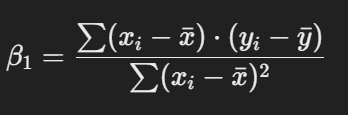

### steps to calculate intercept(β0, b):
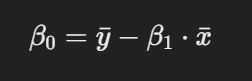



In [3]:
# calculating
x_bar = df['Temperature'].mean()
y_bar = df['Revenue'].mean()
df['a'] = df['Temperature'] - x_bar
df['b'] = df['Revenue'] - y_bar

df['aXb'] = df['a'] * df['b']

m = sum(df['aXb'])/sum(np.square(df['a']))
print("SLOPE (m)::", m)

b = y_bar - (m * x_bar)
print("Intercept (b)::", b)

df['y_pred'] = m*df['Temperature'] + b

df

SLOPE (m):: 21.443625510680278
Intercept (b):: 44.83126709056319


,Temperature,Revenue,a,b,aXb,y_pred
0,24.566884,534.799028,2.334659,13.228252,30.883461,571.634337
1,26.005191,625.190122,3.772966,103.619345,390.952269,602.476847
2,27.790554,660.632289,5.558329,139.061512,772.949603,640.761497
3,20.595335,487.706960,-1.636890,-33.863816,55.431345,486.469919
4,11.503498,316.240194,-10.728727,-205.330582,2202.935859,291.507963
...,...,...,...,...,...,...
495,22.274899,524.746364,0.042674,3.175588,0.135515,522.485865
496,32.893092,755.818399,10.660867,234.247622,2497.282743,750.178416
497,12.588157,306.090719,-9.644068,-215.480058,2078.104365,314.766991
498,22.362402,566.217304,0.130177,44.646527,5.811962,524.362249


In [8]:
mse = mean_squared_error(df['Revenue'], df['y_pred'])
print("MSE::", mse)
print("RMSE::", mse**0.5)

KeyError: 'y_pred'

## USING SKLEARN

MODEL:: LinearRegression()
MSE:: 592.8023375060735
RMSE:: 24.347532472636185


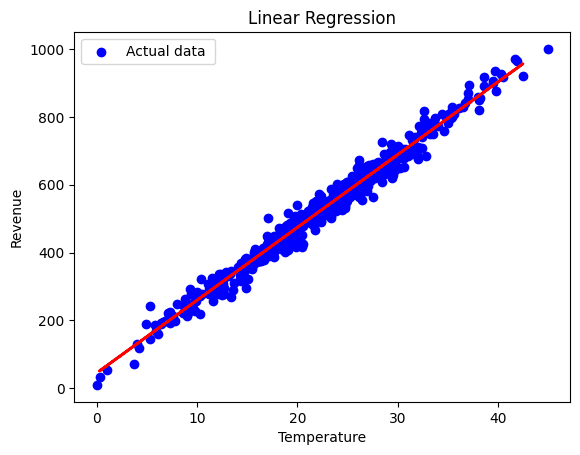

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

df = pd.read_csv('DATA/IceCreamData.csv')

x_train, x_test, y_train, y_test = train_test_split(df['Temperature'], df['Revenue'], test_size = 0.3, random_state=42)
x_train, x_test, y_train, y_test = x_train.values.reshape(-1, 1), x_test.values.reshape(-1, 1), y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(x_train, y_train)
print("MODEL::", model)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE::", mse)
print("RMSE::", mse**0.5 )

plt.scatter(df['Temperature'],df['Revenue'],color='blue',label='Actual data ')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Linear Regression')
plt.legend()
plt.show()

## GRADIENT DESCENT

- A gradient is a vector (a set of values) that points in the direction of the steepest increase of a function. In optimization (like minimizing the loss in linear regression), we are interested in moving in the direction of the steepest decrease, which is why we move in the opposite direction of the gradient.
- Think of a gradient like a slope on a hill:

    - If you're standing on a hill and want to get to the bottom (minimize your position), the gradient tells you the direction of the steepest uphill slope.
    - To go downhill, you move in the opposite direction of the gradient, which is the steepest path to minimize your elevation (the same concept is applied in gradient descent to minimize the loss).

 <br>
 
- `dldb`: The gradient of the loss function with respect to b. It tells us how sensitive the loss is to changes in the intercept.
- `dldm`: The gradient of the loss function with respect to m. It tells us how sensitive the loss is to changes in the slope.

In [13]:
def GD(x, y, m, b, LR):
    dldb = -2 / len(x) * (y- (m * x+b)).sum()
    dldm = -2 / len(x) * ((y- (m * x+b))*x).sum()
    b = b - LR * dldb
    m = m -LR * dldm
    return m, b

x= df['Temperature']
y = df['Revenue']
m = 0
b = 0
LR = 0.001
GrdDsc = []
best_loss = float('inf')
best_m = m
best_b = b
no_improve_counter = 0
patience = 500

for i in range(1000000):
    m,b = GD(x, y, m, b, LR)
    yhat = m*x +b
    loss = mean_absolute_error(y, yhat)
    GrdDsc.append({'Iteration':i, 'm':m, 'b':b, 'Loss': loss})

    if loss < best_loss:
        best_loss = loss
        best_m = m
        best_b = b
        no_improve_counter = 0
    else:
        no_improve_counter += 1

    if no_improve_counter >= patience:
        print(f"Early stopping at iteration {i}.")
        break

print(f"Best Values: m={best_m}, b= {best_b} with loss = {best_loss}.")
GrdDsc_df = pd.DataFrame(GrdDsc)
GrdDsc_df

Early stopping at iteration 22052.
Best Values: m=21.455019772116028, b= 44.54447844346613 with loss = 19.585007052681032.


,Iteration,m,b,Loss
0,0,25.997058,1.043142,62.015447
1,1,22.847031,0.928252,23.944254
2,2,23.228204,0.953656,22.958727
3,3,23.181568,0.962061,22.928419
4,4,23.186762,0.972523,22.928026
...,...,...,...,...
22048,22048,21.453774,44.575833,19.585099
22049,22049,21.453772,44.575893,19.585099
22050,22050,21.453769,44.575952,19.585099
22051,22051,21.453767,44.576012,19.585099


---
## 2.2 Multiple Linear Regression.

In [14]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import sklearn.metrics as metrics

df = pd.read_csv('DATA/Admission.csv')
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
373,374,321,109,3,3.0,3.0,8.54,1,0.79
161,162,298,99,1,1.5,3.0,7.46,0,0.53
163,164,317,105,3,3.5,3.0,8.56,0,0.68
422,423,322,112,4,3.5,2.5,9.02,1,0.73
370,371,310,103,2,2.5,2.5,8.24,0,0.72


In [15]:
df.drop("Serial No.", axis = 1, inplace=True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Chance of Admit',axis=1),df['Chance of Admit'],
                                                    test_size=0.3,random_state=42)

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
#beta values m
lr.coef_

array([0.00223026, 0.00342779, 0.00309507, 0.00151506, 0.01521993,
       0.11578339, 0.02074951])

In [18]:
lr.intercept_

-1.4221480007497251

In [20]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print("MSE::",mse)
print("MAE::", mae)
print("RMSE::", mse**0.5)
print("R2_Score::", r2)

MSE:: 0.003634217801251108
MAE:: 0.04267341377223837
RMSE:: 0.060284473965118976
R2_Score:: 0.8256306039919489


---
## 2.3 Polynomial Linear Regression

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import sklearn.metrics as metrics

df = pd.read_csv("DATA/PolyData.csv")

In [2]:
df.drop('Unnamed: 0', axis=1, inplace=True)

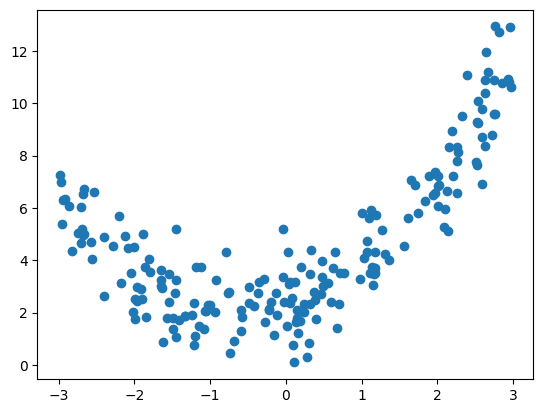

In [3]:
plt.scatter(df['x'], df['y']);

m:: [1.020386]


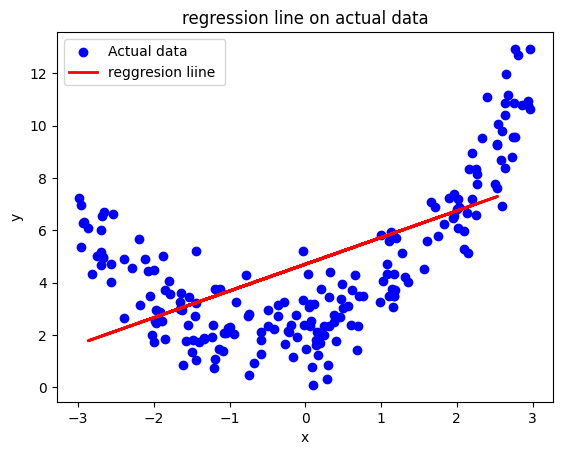

5.415346073857585
1.969441276400827
2.3270896144879307
-0.35730655997769656


In [6]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

print("m::",lr.coef_)
y_pred=lr.predict(x_test)

plt.scatter(df['x'],df['y'],color='blue',label='Actual data')
plt.plot(x_test,y_pred, color='red',linewidth=2,label='reggresion liine ')
plt.xlabel('x')
plt.ylabel('y')
plt.title("regression line on actual data")
plt.legend()
plt.show()

y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=metrics.r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)


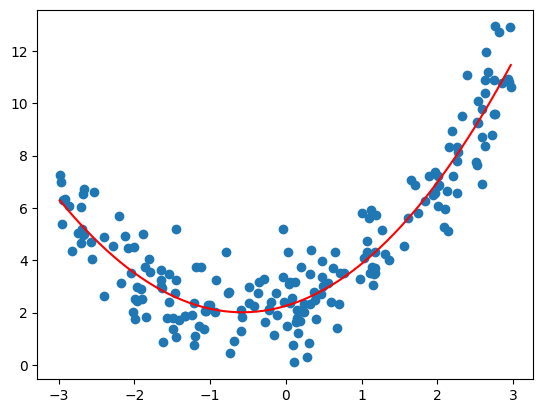

In [9]:
x=df['x'].values.reshape(-1,1)
y=df['y'].values.reshape(-1,1)
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

lr2 = LinearRegression()
lr2.fit(x_poly, y)

x_range=np.linspace(min(x),max(x),len(x))
plt.scatter(x,y)
plt.plot(x_range,lr2.predict(poly.fit_transform(x_range.reshape(-1,1))),color='red');